# Bayesian Classification By Phoneme Frequency
Camille Girard

Jonah Spicher

## Abstract

For this project we would like to recognize the language of a word based on the phonemes in the word. Given a word, input in its phoneme form, and a predefined dataset of phoneme frequency in each language being tested, we will run through all the phonemes in the word and calculate the probability of each language. Combining all the phonemes of the word will return an updated probability that the observed word is in that language. 

Question: Let's say you are in a place where people are speaking five languages: English, Spanish, Mandarin, and Arabic. You overhear someone say a word, based on the sounds in that word, which language are they speaking? 

## Introduction
Usualy, it is fairly easy to tell what language someone is speaking just by hearing it, at least assuming you have heard that language spoken before. The information is being conveyed (obviously) by the sounds they are making, so it should be possible to guess the language of a word given the sounds that make that word up. Bayesian classification provides a fairly straightforward solution: figure out how often those phonemes appear in a given language, and the probability that you heard that language followes from Bayes theorem. 

## Code

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import math
import numpy as np

from thinkbayes2 import Pmf, Cdf, Suite
import thinkplot

We start with an even prior. This is obviously not a reasonable decision in real life. At the most basic level, you would want to factor in the percentage of people in the world who speak each language, but in reality your prior will skew heavily towards the domnant languages in your area. For this toy example in a mysterious room with only these four (somewhat random) languages, it seems like a reasonable choice, and will at least show how strong of evidence each word offers. Really, this project isn't about the actual likelihood of each language, but rather whether a word was evidence for or against each language.

We chose to work with English, Spanish, Arabic, and Mandarin, partially due to phonetic differences, and partially due to the availability of data.

In [2]:
languages = ['English', 'Spanish','Arabic', 'Mandarin']
lang_prior = Pmf(languages)
lang_prior.Print()

Arabic 0.25
English 0.25
Mandarin 0.25
Spanish 0.25


### Classification code

Next, we need to define our suite and its parameters. For now, a naive Bayesian model seems fine, but given time we will revisit this decision, as this ignores dipthongs, which often are defining features in a language. Here, though, our data is just a series of phonemes, and our hypothesis is a language. The likelihood, then, is just how often the given phoneme appears in our hypothetical language. We have stored these values in a .csv file, so likelihood is just a simple lookup.

In [3]:
import pandas as pd
loc = "/home/jonah/Bayesian-Phoneme-Frequencies/code/" # Jonah's laptop
# loc = "/home/cgirard/Bayesian-Phoneme-Frequencies/code/" # Camille's laptop
document = loc + "Phonemes - Sheet1.csv"
df = pd.read_csv(document)
df.head()

,Phonemes,English,Spanish,Mandarin,Arabic
0,ə,0.1149,0.000,0.000000,0.000000
1,n,0.0711,0.071,0.082144,0.057047
2,r,0.0694,0.054,0.005955,0.080537
3,t,0.0691,0.045,0.016942,0.020134
4,ɪ,0.0632,0.000,0.000000,0.000000


To account for imperfections in the data, if a phoneme does not appear (has a frequency of 0%) we chose to add a small amount so that each language wasn't ruled out immediately. Other than that, the likelihood is the product of the frequency of each phoneme in the word. 

In [4]:
class Language(Suite):
    
    def Likelihood(self, data, hypo):
        """
        data: list of phonemes 
        hypo: name of languages
        """
        language = hypo
        like = 1
        for i in data:
            #lookup the row number of that phoneme
            row = df.loc[df['Phonemes']==i].index
            if row.size < 1:
                #if the phoneme is not in the data
                like *= 0.0001
            else:
                value = df[language][row[0]]
                if value <= 0:
                    like *= 0.0001
                else:
                    like *= value
        return like

## Results
Now, we just have to feed the Suite each word (in IPA) and it should get a decent idea of which language each word belongs to. For this section, we chose two words at random and translated them into IPA for each language.

First, the word "Thursday," and each relevant translation of thursday.

Arabic 2.5385443996418426e-05
English 0.9999737483342728
Mandarin 1.5921999732097614e-13
Spanish 8.662215715191208e-07


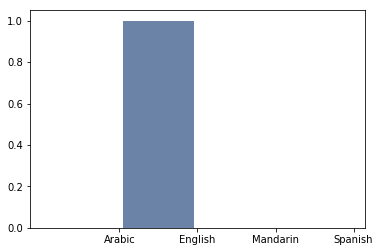

In [5]:
lang_dist = Language(lang_prior)
word = ['θ','ɜ','r','z','d','e', 'ɪ'] # Thursday
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

It gets Spanish pretty wrong, likely because this word doesn't use any terribly unique phonemes in Spanish.

Arabic 4.4016521710834596e-07
English 0.9964665664242205
Mandarin 5.231399238775734e-10
Spanish 0.003532992887422357


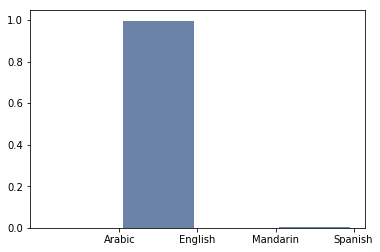

In [6]:
lang_dist = Language(lang_prior)
word = ['H','w','e','v','e','s'] # Jueves
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

Arabic 0.5897905659241904
English 0.0011339358287135845
Mandarin 0.24337127822551957
Spanish 0.16570422002157642


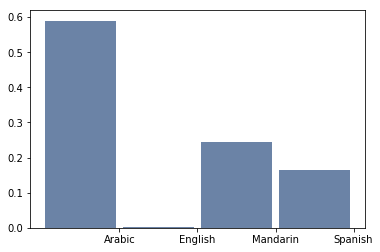

In [7]:
lang_dist = Language(lang_prior)
word = ['a:','l','x','a:','m','i','sˤ'] #  الخميس
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

Arabic 1.2329210572083703e-12
English 0.00625257042084591
Mandarin 0.9929836503515591
Spanish 0.0007637792263620646


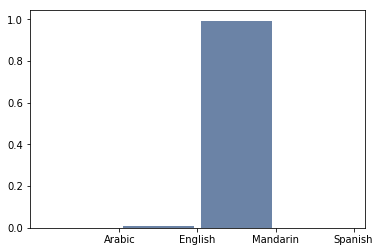

In [8]:
lang_dist = Language(lang_prior)
word = ['ɕ','i','ŋ','ts','i','s','i'] # 星期四
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

So we correctly classified three of the four words.

Next, "Dog."

Arabic 0.008264462809917356
English 0.975206611570248
Mandarin 0.008264462809917356
Spanish 0.008264462809917356


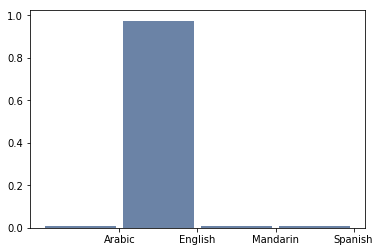

In [9]:
lang_dist = Language(lang_prior)
word = ['D', 'ɒ', 'ɡ'] # Dog
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

Arabic 1.5570896729655457e-08
English 0.0003483988143260409
Mandarin 1.5570896729655457e-08
Spanish 0.9996515700438804


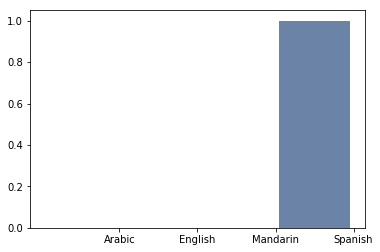

In [10]:
lang_dist = Language(lang_prior)
word = ['p', 'e', 'rr', 'o'] # Perro
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

Arabic 0.6433159968279458
English 0.10942563339044128
Mandarin 9.253687161725321e-05
Spanish 0.24716583290999566


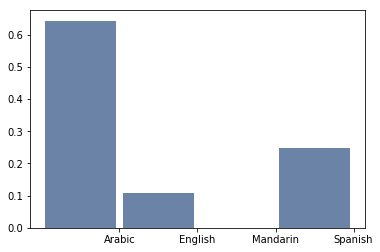

In [11]:
lang_dist = Language(lang_prior)
word = ['aː', 'l', 'k', 'a:', 'l', 'b'] #  الكلب
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

Arabic 0.25277486417360306
English 0.26615508033375324
Mandarin 0.12117482107907812
Spanish 0.3598952344135656


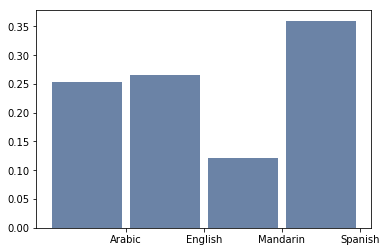

In [12]:
lang_dist = Language(lang_prior)
word = ['k', 'au'] # 狗
lang_dist.Update(word)
lang_dist.Print()
thinkplot.Hist(lang_dist)

Gao is a pretty short word, so this classifier doesn't have a ton of information. But, with the little information it had, it was confidently working in the wrong direction.

This attempt was also accurate on three out of four, but this time the problem was Mandarin, and the issues was probably the fact that Gao isn't very long, and thus doesn't provide much information. With the information it had, the classifier worked confidently in the wrong direction.

## Conclusion

The results show that reading a lanuage from a words' phonemes is possible and the classifier gives the correct answer about 75% of the time. This is likely due in part to the limited data that only encompasses some of the phonemes and the lack of comprehensiveness of the likelihood of one phoneme following another in each language. If we were to continue, we would spend more time finding accurate phoneme frequency charts, ideally for more languages, and streamline the process of representing words as phonemes (which currently involves a lot of the Help:IPA pages on Wikipedia). To increase accuracy, we would also expand our model to account for correlation between phonemes. 

Given overhearing a word you can find which language they are speaking based on the phonemes. In this clalssifier the data and assumptions cause some miclassification of words, but can genreally give a good idea, especially with unique phonemes and longer words. 